In [121]:
library(repr)
library(MASS)
library(dplyr)
library(GGally)
library(ggplot2)
library(ggfortify)
library(Hmisc)
library(lmtest)
library(car)
library(pROC)
library(compare)
library(tidyverse)
library(gridExtra)
library(tigris)
library(leaps)
library(usmap)
library(ggthemes)
library(sf)
options(tigris_class = "sf")
options(tigris_use_cache = TRUE)

#### Load Data

In [122]:
pol = read.csv("police_killings_cleaned.csv", stringsAsFactors = FALSE)
head(pol)
cat(paste("Number of rows in police killings dataset: ", dim(pol)[1]))

name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,⋯,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
A'donte Washington,17,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,⋯,5.6,28375,51367,54766,0.9379359,3,3,14.1,0.09768638,0.16850951
Aaron Rutledge,28,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,⋯,0.5,14678,27972,40930,0.6834107,2,1,28.8,0.06572379,0.11140236
Aaron Siler,27,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,⋯,16.8,25286,45365,54930,0.8258693,2,3,14.6,0.16629314,0.14731227
Aaron Valdez,26,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,⋯,98.8,17194,48295,55909,0.8638144,3,3,11.7,0.12482727,0.05013293
Adam Jovicic,30,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,⋯,1.7,33954,68785,49669,1.3848678,5,4,1.9,0.06354983,0.40395421
Adam Reinhart,30,Male,White,March,7,2015,18th St and Palm Ln,Phoenix,AZ,⋯,79,15523,20833,53596,0.3887044,1,1,58,0.07365145,0.10295519


Number of rows in police killings dataset:  467

In [123]:
colnames(pol)[colnames(pol)=="geo_id"] = "CensusTract"

In [124]:
acs = read.csv("acs2015_census_tract_data.csv", stringsAsFactors = FALSE)
head(acs)
cat(paste("Number of rows in survey dataset: ", dim(acs)[1]))

CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,⋯,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
1001020100,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,⋯,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0,5.4
1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,⋯,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0,13.3
1001020300,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,⋯,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0,6.2
1001020400,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,⋯,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0,10.8
1001020500,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,⋯,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0,4.2
1001020600,Alabama,Autauga,3851,1787,2064,13.1,72.9,11.9,0.0,⋯,0.0,6.0,4.5,19.8,1560,79.4,14.7,5.8,0,10.9


Number of rows in survey dataset:  74001

In [125]:
combined = merge(pol, acs, by="CensusTract")
head(combined)
cat(paste("Number of rows in combined dataset: ", dim(combined)[1]))

CensusTract,name,age,gender,raceethnicity,month,day,year,streetaddress,city,⋯,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
1003010300,Gilbert Fleury,55,Male,White,March,11,2015,Cliffs Landing Rd,Bay Minette,⋯,0.8,0.3,2.8,28.8,3033,79.4,17.5,2.4,0.8,7.7
1051030902,A'donte Washington,17,Male,Black,February,23,2015,Clearview Ln,Millbrook,⋯,0.0,7.1,0.4,30.1,1847,71.5,22.0,6.5,0.0,9.1
1073002000,Douglas Harris,74,Male,Black,March,27,2015,7901 1st Ave S,Birmingham,⋯,1.7,3.2,3.5,23.0,1464,86.8,10.9,2.3,0.0,8.0
1073005000,Stanley Grant,39,Male,Black,February,20,2015,2200 Green Springs Hwy,Birmingham,⋯,3.0,2.5,0.9,18.4,2221,86.2,11.1,2.7,0.0,4.9
1073014412,William 'Rusty' Smith,54,Male,White,March,10,2015,700 Valley St,Hoover,⋯,0.0,0.5,2.8,22.0,2597,71.5,25.5,2.5,0.5,2.7
1079979500,Shane Watkins,40,Male,White,March,19,2015,1040 County Rd 249,Moulton,⋯,0.0,0.0,0.0,26.6,1909,77.6,13.1,8.0,1.3,9.7


Number of rows in combined dataset:  467

In [126]:
combined = na.omit(combined)
cat(paste("Number of rows in complete combined dataset: ", dim(combined)[1]))

Number of rows in complete combined dataset:  435

In [127]:
regions = read.csv('us_census_bureau_regions.csv', stringsAsFactors = FALSE)
head(regions)

State,State.Code,Region,Division
Alaska,AK,West,Pacific
Alabama,AL,South,East South Central
Arkansas,AR,South,West South Central
Arizona,AZ,West,Mountain
California,CA,West,Pacific
Colorado,CO,West,Mountain


In [128]:
for (row in 1:nrow(combined)) {
    st = combined[row, "State"]
    subset_df = regions[regions$State==st,]
    if (nrow(subset_df) > 1) {
        print("Error")
    } else {
        region = unlist(unname(subset_df['Region']))
        div = unlist(unname(subset_df['Division']))
        combined[row, "Region"] = region
        combined[row, "Division"] = div
    }
}

In [129]:
describe(combined$Division)

combined$Division 
       n  missing distinct 
     435        0        9 

East North Central (41, 0.094), East South Central (24, 0.055), Middle Atlantic
(29, 0.067), Mountain (52, 0.120), New England (8, 0.018), Pacific (97, 0.223),
South Atlantic (81, 0.186), West North Central (29, 0.067), West South Central
(74, 0.170)

In [130]:
describe(combined$Region)

combined$Region 
       n  missing distinct 
     435        0        4 
                                                  
Value        Midwest Northeast     South      West
Frequency         70        37       179       149
Proportion     0.161     0.085     0.411     0.343

#### Building the model

In [131]:
combined["is_black"] = combined["raceethnicity"] == 'Black'

# mod.fit = glm(is_black ~ age + gender + armed + h_income + urate + pop + 
#                         Service + Office + Production + Construction + Professional +
#                         PublicWork + PrivateWork + SelfEmployed + FamilyWork +
#                         Drive + Carpool + Walk + Transit + OtherTransp + WorkAtHome,
#                  data=combined, family="binomial")

# The following model was obtained using best subset selection
mod.fit = glm(is_black ~ age + cause + college + Poverty + Carpool + Transit + SelfEmployed + Unemployment,
             data=combined, family="binomial")

In [132]:
summary(mod.fit)


Call:
glm(formula = is_black ~ age + cause + college + Poverty + Carpool + 
    Transit + SelfEmployed + Unemployment, family = "binomial", 
    data = combined)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8038  -0.7793  -0.5241   0.7792   2.3336  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)             1.21243    0.93242   1.300  0.19350    
age                    -0.03434    0.01058  -3.245  0.00118 ** 
causeGunshot           -1.55247    0.64002  -2.426  0.01528 *  
causeStruck by vehicle -1.25135    0.98576  -1.269  0.20429    
causeTaser             -0.63408    0.77408  -0.819  0.41271    
causeUnknown           -1.81994    1.56487  -1.163  0.24483    
college                 1.69568    0.91044   1.862  0.06254 .  
Poverty                 0.02448    0.01170   2.091  0.03652 *  
Carpool                -0.04823    0.02272  -2.123  0.03374 *  
Transit                 0.03194    0.01339   2.385  0.01709 *  
Self

#### Prediction

In [133]:
prob_black = predict(mod.fit, type="response")

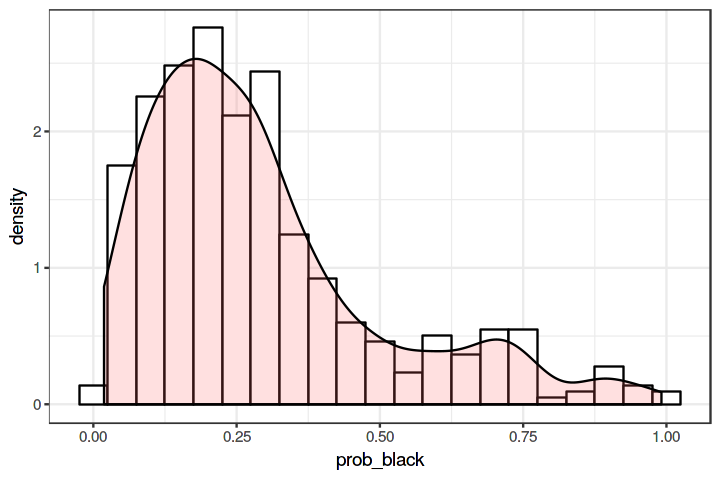

In [141]:
options(repr.plot.width = 6, repr.plot.height = 4)
ggplot(data.frame(prob_black), aes(x=prob_black)) + 
    geom_histogram(aes(y=..density..), color="black", fill="white", binwidth=0.05) + 
    geom_density(alpha=.2, fill="#FF6666") + theme_bw()

In [142]:
combined["pred_black"] = prob_black > 0.5

In [143]:
head(combined)

CensusTract,name,age,gender,raceethnicity,month,day,year,streetaddress,city,⋯,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Region,Division,is_black,pred_black
1003010300,Gilbert Fleury,55,Male,White,March,11,2015,Cliffs Landing Rd,Bay Minette,⋯,3033,79.4,17.5,2.4,0.8,7.7,South,East South Central,FALSE,FALSE
1051030902,A'donte Washington,17,Male,Black,February,23,2015,Clearview Ln,Millbrook,⋯,1847,71.5,22.0,6.5,0.0,9.1,South,East South Central,TRUE,FALSE
1073002000,Douglas Harris,74,Male,Black,March,27,2015,7901 1st Ave S,Birmingham,⋯,1464,86.8,10.9,2.3,0.0,8.0,South,East South Central,TRUE,FALSE
1073005000,Stanley Grant,39,Male,Black,February,20,2015,2200 Green Springs Hwy,Birmingham,⋯,2221,86.2,11.1,2.7,0.0,4.9,South,East South Central,TRUE,FALSE
1073014412,William 'Rusty' Smith,54,Male,White,March,10,2015,700 Valley St,Hoover,⋯,2597,71.5,25.5,2.5,0.5,2.7,South,East South Central,FALSE,FALSE
1079979500,Shane Watkins,40,Male,White,March,19,2015,1040 County Rd 249,Moulton,⋯,1909,77.6,13.1,8.0,1.3,9.7,South,East South Central,FALSE,FALSE


In [144]:
acc = 0
tp = 0
fp = 0
tn = 0
fn = 0
for (row in 1:nrow(combined)) {
    true_val = combined[row, "is_black"]
    pred_val = combined[row, "pred_black"]
    if (true_val == pred_val){
        acc = acc + 1
    }
    if (true_val == TRUE && pred_val == TRUE){
        tp = tp + 1
    }
    if (true_val == FALSE && pred_val == FALSE){
        tn = tn + 1
    }
    if (true_val == FALSE && pred_val == TRUE){
        fp = fp + 1
    }
    if (true_val == TRUE && pred_val == FALSE){
        fn = fn + 1
    }
}
acc = acc / nrow(combined)
cat(paste("Model accuracy is: ", acc, '\n', sep=""))
cat(paste("Number of true positives: ", tp, '\n', sep=""))
cat(paste("Number of true negtives: ", tn, '\n', sep=""))
cat(paste("Number of false positives: ", fp, '\n', sep=""))
cat(paste("Number of false negtives: ", fn, '\n', sep=""))
cat(paste("Total number of observations: ", tp+fp+tn+fn, ' (Expected: 435)\n', sep=""))

Model accuracy is: 0.76551724137931
Number of true positives: 45
Number of true negtives: 288
Number of false positives: 20
Number of false negtives: 82
Total number of observations: 435 (Expected: 435)


#### Quantify Bias
We predict the proportion of black population within each region (Midwest, Northeast, South, West) using our fitted model. Then we compare to actual distribution of black population for each region. If there is a systematic difference, then we can conclude that there is a bias against african-americans

In [145]:
for (reg in unique(combined$Region)){
    
    region_df = combined[combined$Region == reg,]
    num_rows = nrow(region_df)
    cat(paste("Number of records for region:", reg, ":", num_rows, "\n"))
    
    region_df["is_black"] = region_df["raceethnicity"] == 'Black'
    num_afa = nrow(region_df[region_df["is_black"] == TRUE,])
    cat(paste("Number of african-americans in killings dataset:", num_afa, "\n"))
    
    num_afa_pred = nrow(region_df[region_df["pred_black"] == TRUE,])
    cat(paste("Predicted number of african-americans in killings dataset:", num_afa_pred, "\n"))
    
    prop = (num_afa_pred/num_rows)
    cat(paste("Proportion of black population according to prediction:", prop, "\n"))
    
    act_prop = mean(as.numeric(region_df$share_black))/100
    cat(paste("Actual proportion of black population in region:", act_prop, "\n"))
    
    cat("\n\n")
    
}

Number of records for region: South : 179 
Number of african-americans in killings dataset: 70 
Predicted number of african-americans in killings dataset: 22 
Proportion of black population according to prediction: 0.122905027932961 
Actual proportion of black population in region: 0.255687150837989 


Number of records for region: West : 149 
Number of african-americans in killings dataset: 19 
Predicted number of african-americans in killings dataset: 15 
Proportion of black population according to prediction: 0.100671140939597 
Actual proportion of black population in region: 0.0559865771812081 


Number of records for region: Northeast : 37 
Number of african-americans in killings dataset: 13 
Predicted number of african-americans in killings dataset: 9 
Proportion of black population according to prediction: 0.243243243243243 
Actual proportion of black population in region: 0.179621621621622 


Number of records for region: Midwest : 70 
Number of african-americans in killings da

#### Diagnostic Plots

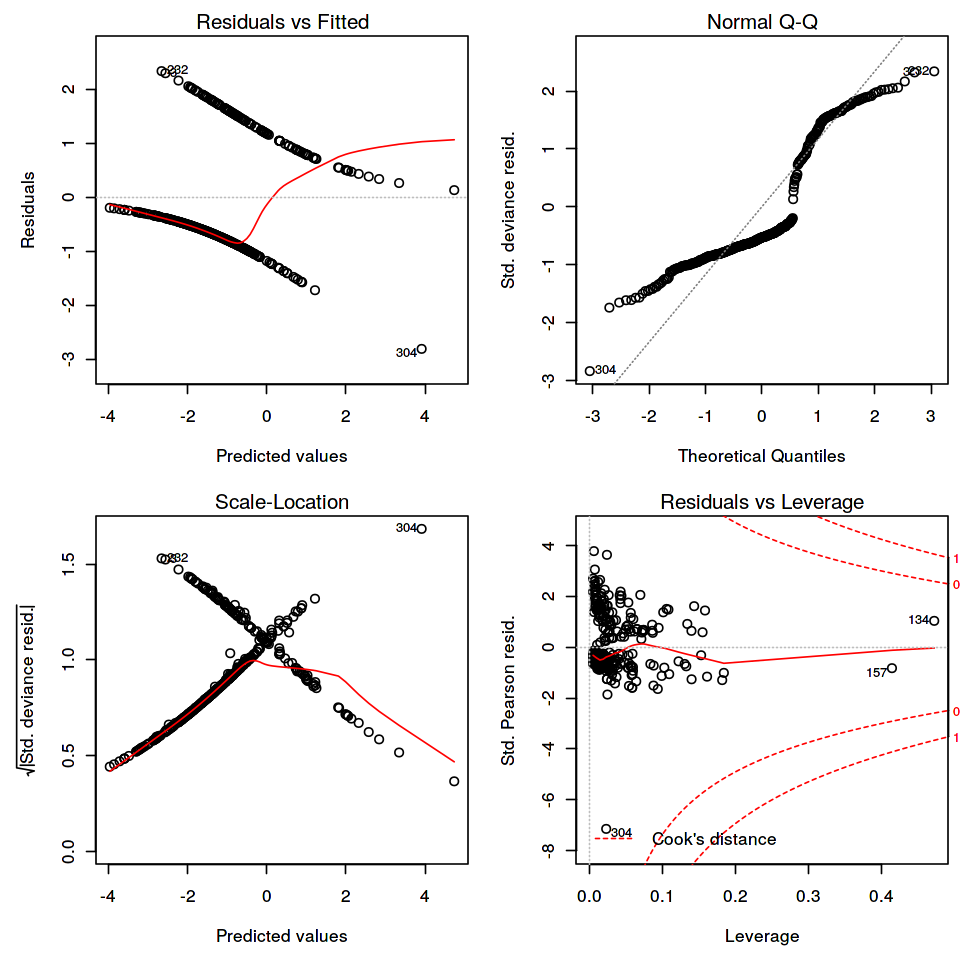

In [146]:
par(mfrow = c(2, 2), mai = c(0.8, 0.8, 0.3, 0.1))
options(repr.plot.width = 8, repr.plot.height = 8)
plot(mod.fit)

#### Exploratory Data Analysis

In [147]:
colnames(combined)

[1] "CensusTract"          "name"                 "age"                 
 [4] "gender"               "raceethnicity"        "month"               
 [7] "day"                  "year"                 "streetaddress"       
[10] "city"                 "state"                "latitude"            
[13] "longitude"            "state_fp"             "county_fp"           
[16] "tract_ce"             "county_id"            "namelsad"            
[19] "lawenforcementagency" "cause"                "armed"               
[22] "pop"                  "share_white"          "share_black"         
[25] "share_hispanic"       "p_income"             "h_income"            
[28] "county_income"        "comp_income"          "county_bucket"       
[31] "nat_bucket"           "pov"                  "urate"               
[34] "college"              "State"                "County"              
[37] "TotalPop"             "Men"                  "Women"               
[40] "Hispanic"             "White"                "Black"               
[43] "Native"               "Asian"                "Pacific"             
[46] "Citizen"              "Income"               "IncomeErr"           
[49] "IncomePerCap"         "IncomePerCapErr"      "Poverty"             
[52] "ChildPoverty"         "Professional"         "Service"             
[55] "Office"               "Construction"         "Production"          
[58] "Drive"                "Carpool"              "Transit"             
[61] "Walk"                 "OtherTransp"          "WorkAtHome"          
[64] "MeanCommute"          "Employed"             "PrivateWork"         
[67] "PublicWork"           "SelfEmployed"         "FamilyWork"          
[70] "Unemployment"         "Region"               "Division"            
[73] "is_black"             "pred_black"

Verify that the `Employed`, `Unemployment` and `TotalPop` columns in the census data are related

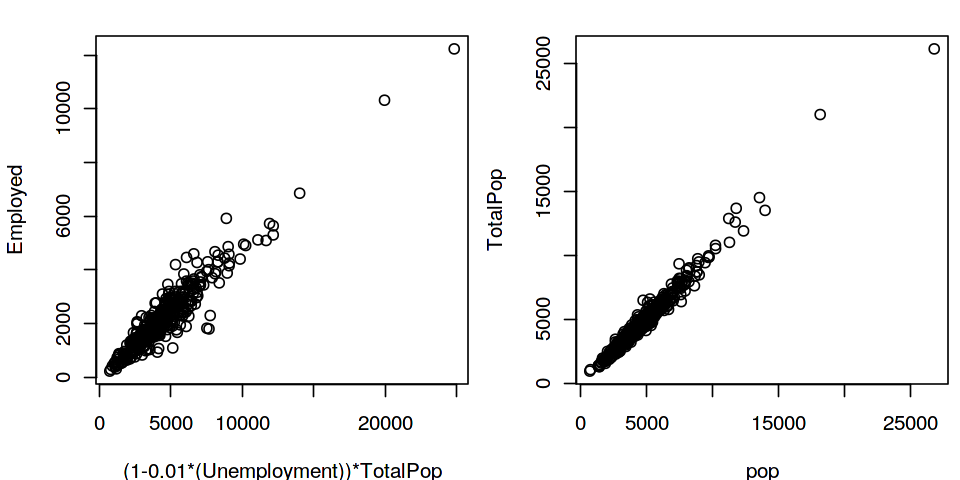

In [148]:
par(mfrow = c(1, 2), mai = c(0.8, 0.8, 0.3, 0.1))
options(repr.plot.width = 8, repr.plot.height = 4)
plot((1 - 0.01*combined$Unemployment)*combined$TotalPop, combined$Employed,
    xlab='(1-0.01*(Unemployment))*TotalPop', ylab='Employed')
plot(combined$pop, combined$TotalPop, xlab='pop', ylab='TotalPop')

Correlation between covariates in the police killings and census data:

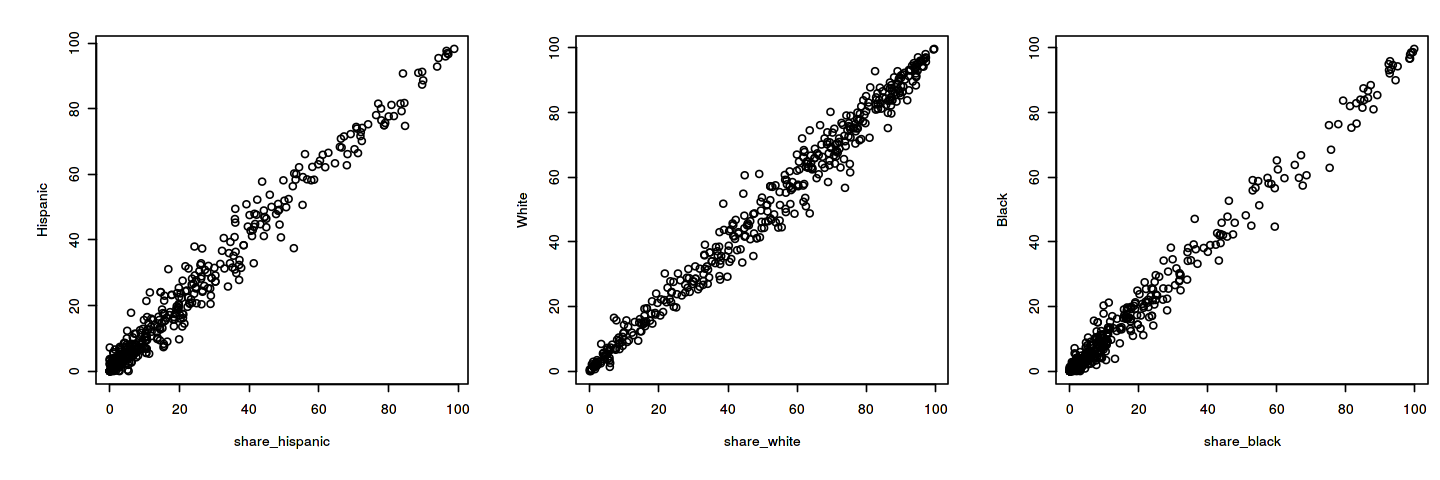

In [149]:
par(mfrow = c(1, 3), mai = c(0.8, 0.8, 0.3, 0.1))
options(repr.plot.width = 12, repr.plot.height = 4)
plot(combined$share_hispanic, combined$Hispanic, xlab='share_hispanic', ylab='Hispanic')
plot(combined$share_white, combined$White, xlab='share_white', ylab='White')
plot(combined$share_black, combined$Black, xlab='share_black', ylab='Black')

We observed that the following variables sum to 100:

``Service + Office + Production + Construction + Professional = 100``

``PublicWork + PrivateWork + SelfEmployed + FamilyWork = 100``

``Drive + Carpool + Walk + Transit + OtherTransp + WorkAtHome = 100``

**CensusTract Dataset:**

| Variable Name | Description | Notes |
| ----------- | ----------- | ----------- |
| County/State | County and State | N/A |
| TotalPop | Population in Tract | Highly correlated with pop, not exactly the same |
| Men/Women | Number of Men/Women in the Tract | N/A |
| Hispanic/White/Black/Native/Asian/Pacific | % of Tract pop belonging to this group | Highly correlated with share_hispanic, share_black and share_white |
| Citizen | Count of citizens in the Tract | Correlated with TotalPop/pop? |
| Income | Tract income | Same as h_income? |
| IncomeErr | N/A | N/A |
| IncomePerCap | Income per capita for the Tract | Same as p_income? |
| IncomePerCapErr | N/A | N/A |
| Poverty | % of Tract that has poverty | Check if thresholded on household income? |
| ChildPoverty | % of children in the Tract below poverty line | N/A |
| Professional/Service/Office/Construction/Production | % of Tract pop in this career | Sum = 100 |
| Drive/Carpool/Transit/Walk/OtherTransp/WorkAtHome | % of Tract pop. locomotion style | Sum = 100 |
| MeanCommute | Mean travel time to work | What are the units? |
| Employed | # of people employed in the Tract | N/A |
| PrivateWork/PublicWork/SelfEmployed/FamilyWork | % of Tract pop. employment sector | Sum = 100 |
| Unemployment | % of Tract pop. that is unemployed | Employed = (1-0.01\*Unemployment)\*TotalPop |

**Police Killings Dataset:**

| Variable Name | Description | Notes |
| ----------- | ----------- | ----------- |
| name | Name of the deceased | N/A |
| age | Age of the deceased | 17-77 |
| gender | Gender of the deceased | Male/Female |
| raceethnicity | Race/Ethnicity | 'Asian/Pacific Islander', 'Black', 'Hispanic/Latino', 'Native American', 'Unknown', 'White' |
| month/day/year | Date of death | Jan-Jun, 2015 |
| streetadress/city/state | Full address of location of death | streetaddress can be interstate (I-99) |
| latitude/longitude | Exact location of death | N/A |
| state_fp | State FIPS code | 1-56, identifies the state/associated region |
| county_fp | County FIPS code | 1-740, identifies the county within the state |
| tract_ce | Tract ID Code | unique identifier for a neighborhood |
| county_id | Combined county ID code | N/A |
| namelsad | Tract description | N/A |
| lawenforcementagency | Agency (police/sheriff dept) involved in the incident | N/A |
| cause | Cause of death | 'gunshot', 'taser', 'hit by vehicle', 'unknown' |
| armed | Whether the deceased was armed? | e.g. 'No','Firearm','Knife','Vehicle','Non-lethal' |
| pop | Tract population | N/A |
| share_white | % of pop that is white (non-hispanic) | N/A |
| share_black | % of pop that is black (non-mixed) | N/A |
| share_hispanic | % of pop that is hispanic/latino (any race) | N/A |
| p_income | Median personal income in the tract | N/A |
| h_income | Median household income in the tract | N/A |
| county_income | Median household income in the county | N/A |
| comp_income | h_income/county_income | N/A |
| county_bucket | Household income quantile within county | N/A |
| nat_bucket | Household income quantile within country (USA) | N/A |
| pov | Poverty rate in the tract | N/A |
| urate | Unemployment rate in the tract | N/A |
| college | Share of 25+ age pop. with atleast a BA | N/A |

Pairwise correlation plot

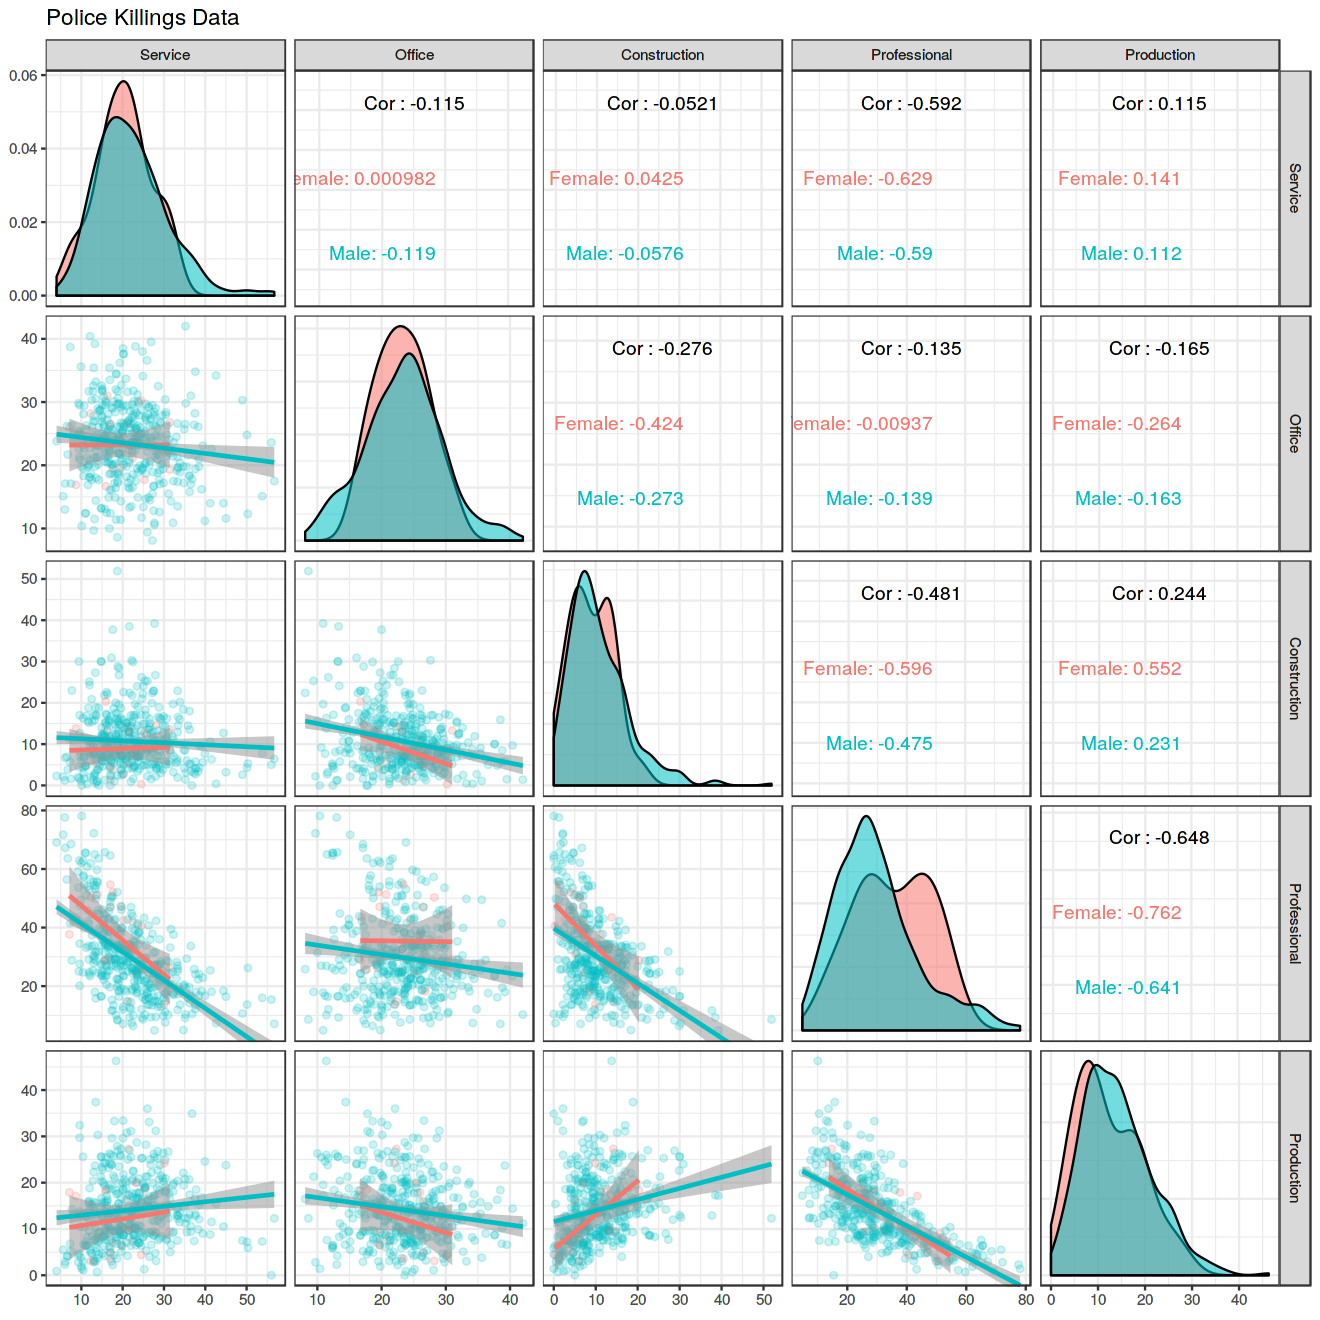

In [58]:
options(repr.plot.width = 11, repr.plot.height = 11)

ggpairs(data=combined, mapping=ggplot2::aes(colour = gender, alpha = 0.7), title="Police Killings Data",
        lower=list(continuous=wrap("smooth", alpha = 0.2)),
        columns = c('Service','Office','Construction','Professional','Production')) + theme_bw()

Plot avg. poverty rate (averged over all tracts) accross the states

In [150]:
subset_df = (combined[c("state_fp","pov")])
subset_df[,2] = sapply(subset_df[, 2], as.numeric)
summarized_df = subset_df %>% group_by(state_fp) %>% summarise(average = mean(pov))

In [151]:
colnames(summarized_df) = c('fips','pov')
# map_with_data(summarized_df, values = "pov", include = c(), na = NA)

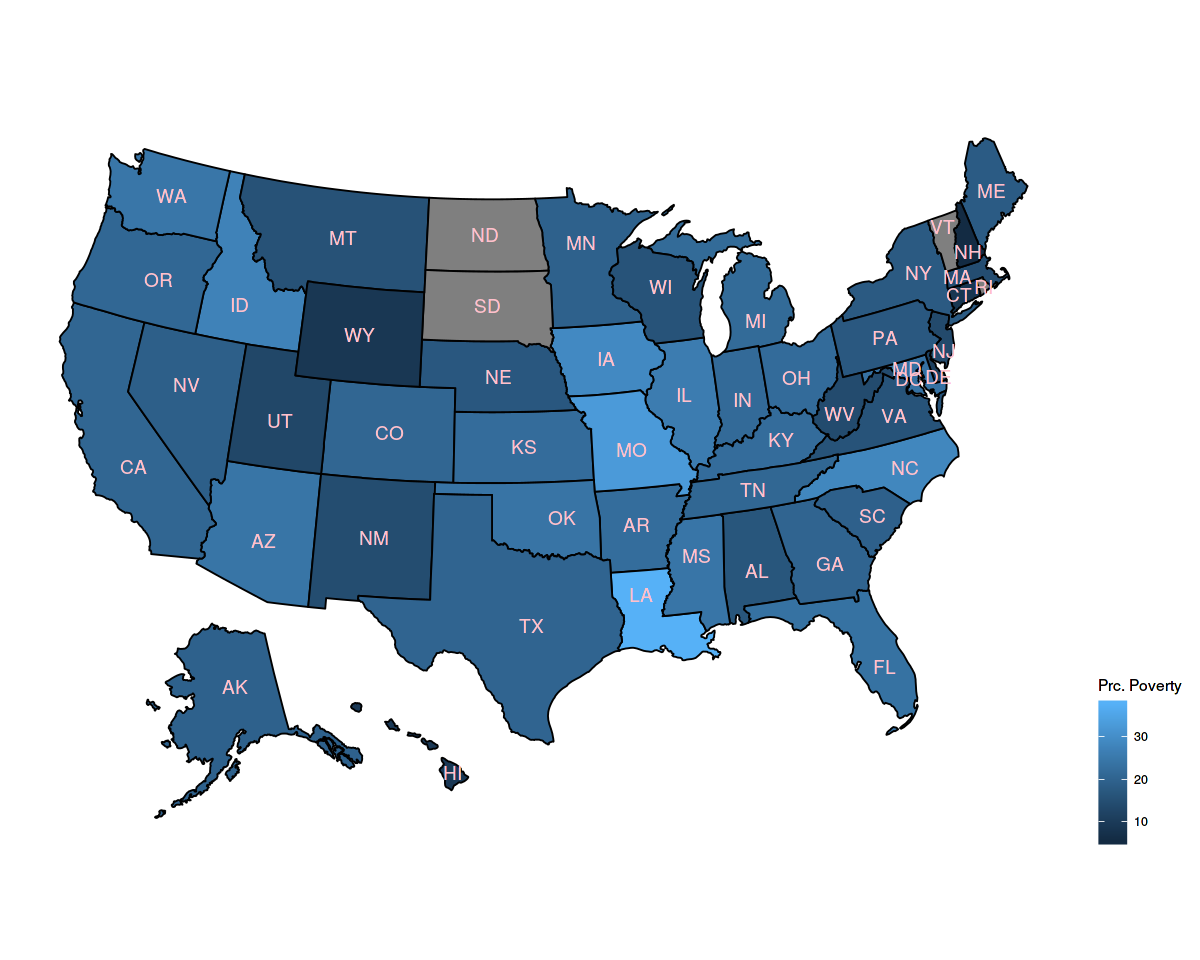

In [152]:
options(repr.plot.width = 10, repr.plot.height = 8)
plot_usmap(regions = c("states", "state", "counties", "county"), 
           include = c(), data = summarized_df, values = "pov",
           theme = theme_map(), lines = "black", labels = TRUE,
           label_color = "pink") + 
           scale_fill_continuous(name = "Prc. Poverty", label = scales::comma) + 
           theme(legend.position = "right")

#### Questions to answer using EDA:
- Is there is any seasonality in crime? 
    - Not enough data
- Income 
    - Affluenct neighbbourhoods more likely to get robbed
    - People from impoverished families more likely to commit crimes
- Employment
- Education
- Law Enforcement
- Transport
    - Better transportation reduces rate of crime
- Confounding factors
    - low education -> low employment -> poverty -> more crime
    
*Remember to normalize by population when comparing across counties and states*

*Create insets for certain states (e.g. California) showing distribution across cities*
    
#### TODO:
- Geographical map showing police killings
    - use different colors and sizes for markers
    - counties in a city
- Distribution of individual covariate values (univariate analysis - is data normally distributed)
- Correlations between covariates
- Imputation?
    - Not too much missing data
- Non-linear analysis
- Time Series analysis
    - Not enough data

**Plan:**

Ideally:
- Randomize race and check if drug abuse have an effect on population
- Assume proportion of drug use is same for caucasians, hispanics, etc.
- Have control group
- Check proportion of population
- Is race an important factor?
- Causal inference: racial bias
- Drug use in the state/tract

Strategy:
- prop of african-americans living in each region (get a distribution over all regions)
- calculate the likelihood of an african american person getting shot over all other races
- compare to original fraction, if higher: then there is a systemic bias.
- comapre the two distributions, hypothesis testing
- include all confounders in the generalized linear model (income, etc.)
- predict for each individual whether they are african-american